In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [21]:
data = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')

In [22]:
print (data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [23]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [24]:
data['Order Date']= pd.to_datetime(data['Order Date'])
data['Ship Date']= pd.to_datetime(data['Ship Date'])

In [25]:
print (data.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [27]:
print(data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [28]:
data=data.drop_duplicates()

In [29]:
data['Year']=data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [30]:
monthly_sales= data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data.dropna(inplace=True)
import warnings
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


## **Analyze Sales Over Time**

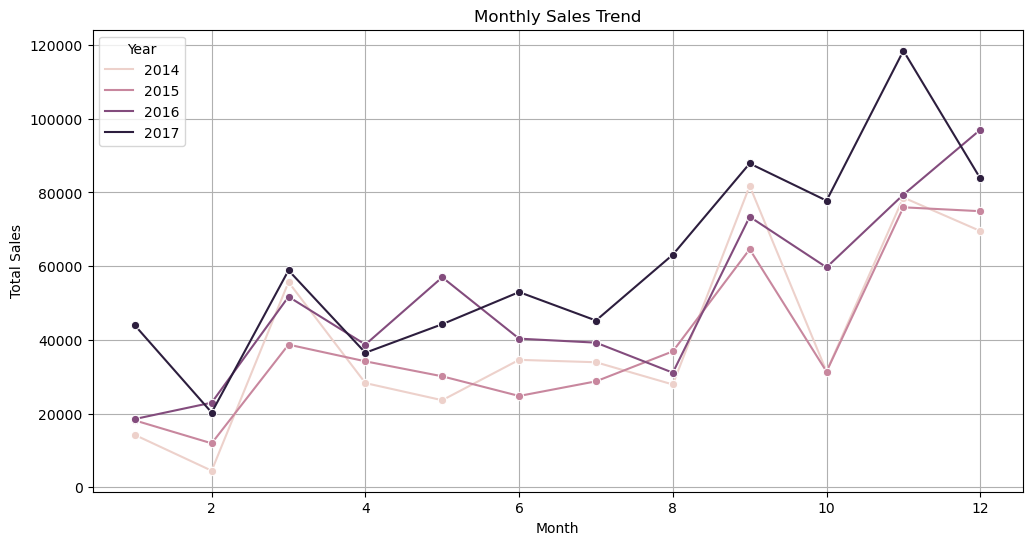

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data = monthly_sales, hue='Year',marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid()
plt.savefig('monthly_sales_trends.png', dpi=300, bbox_inches='tight')
plt.show()


## **Identify Top Products by Sales**

In [32]:
#group by 'product name' and calculate total sales
top_products=data.groupby('Product Name')['Sales'].sum().sort_values(ascending= False).head(10)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


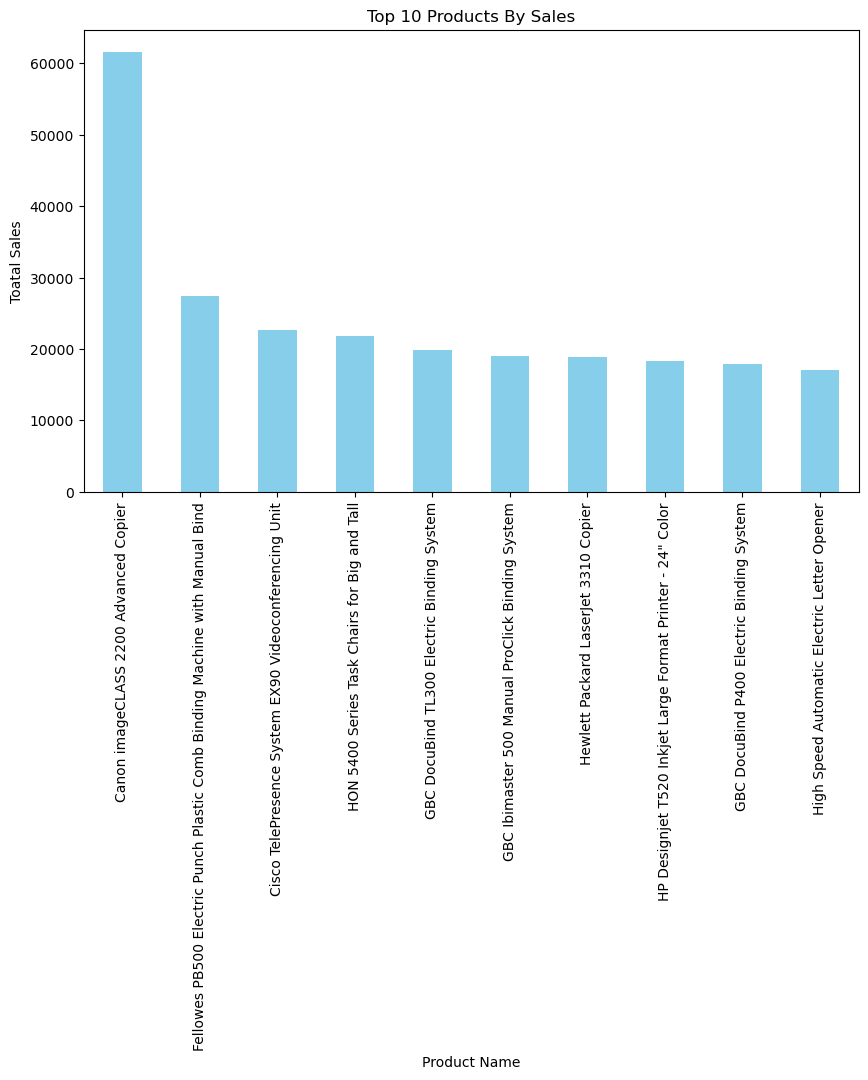

In [33]:
top_products.plot(kind ='bar', figsize=(10,6),color='skyblue')
plt.title('Top 10 Products By Sales')
plt.xlabel('Product Name')
plt.ylabel('Toatal Sales')
plt.savefig('top_products.png', dpi=300, bbox_inches='tight')
#plt.xticks(rotation=70)
plt.show()

## **Analyze Sales by Region**

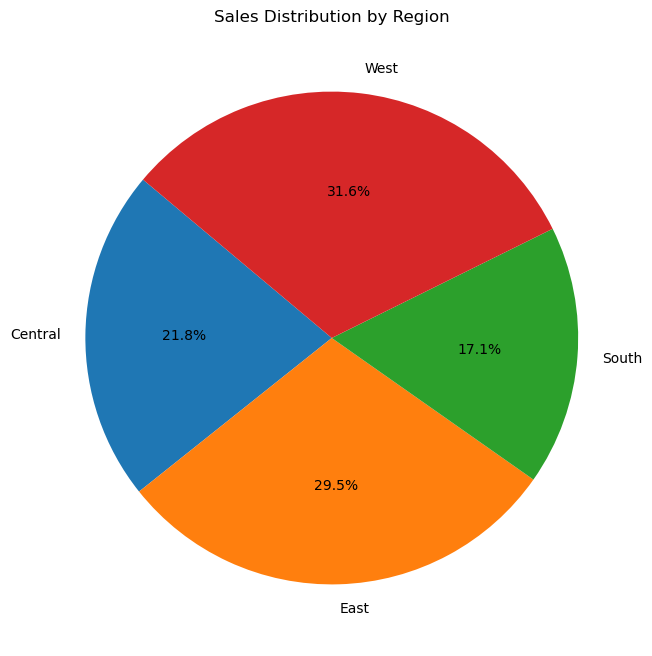

In [34]:
# Group by 'Region' and calculate total sales
region_sales= data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=140)
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.savefig('regional_sales.png', dpi=300, bbox_inches='tight')
plt.show()

## **Analyze Profitability**

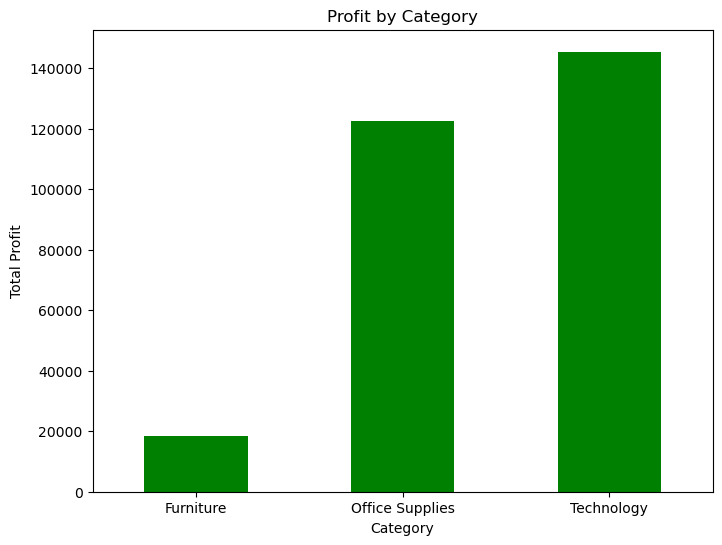

In [35]:
# Plot category profitability
category_profit = data.groupby('Category')['Profit'].sum()
category_profit.plot(kind='bar', figsize=(8,6), color='green')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.savefig('profitability_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

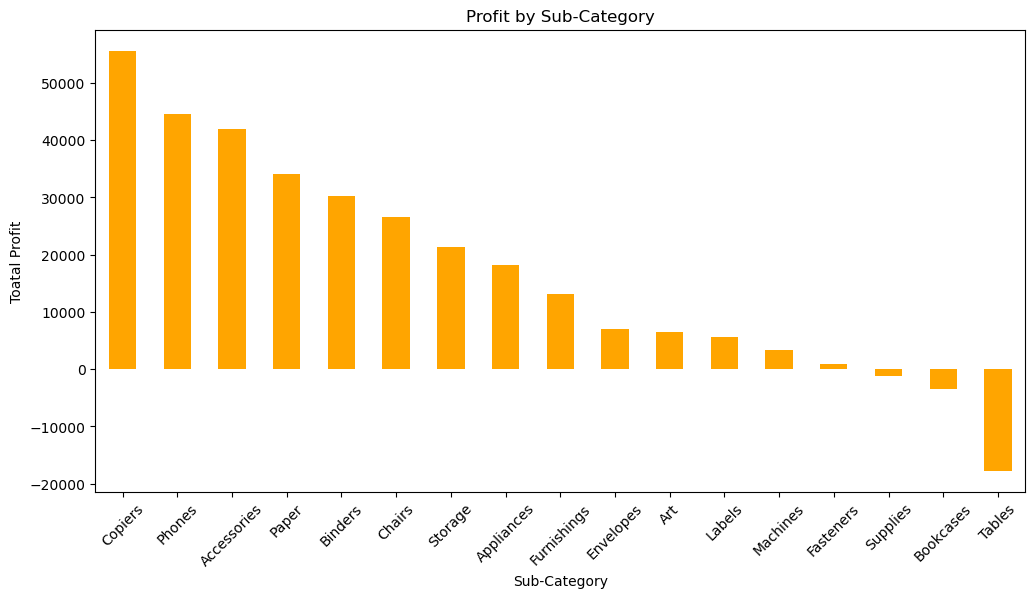

In [36]:
# similarly, analyze the sub Category profitablility
subcat_profit = data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
subcat_profit.plot(kind='bar',figsize=(12,6), color='orange')
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Toatal Profit')
plt.xticks(rotation=45)
plt.savefig('profitability_by_sub-category.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
data.to_csv('Cleaned_Superstore_Data.csv', index=False)

In [38]:
# General Insights
insights = {}

# Sales Trends
insights['highest_sales_month'] = data.groupby(data['Order Date'].dt.month)['Sales'].sum().idxmax()
insights['lowest_sales_month'] = data.groupby(data['Order Date'].dt.month)['Sales'].sum().idxmin()
insights['highest_sales_year'] = data.groupby(data['Order Date'].dt.year)['Sales'].sum().idxmax()

# Top Products
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(3)
insights['top_products'] = top_products.index.tolist()
insights['top_product_sales'] = top_products.values.tolist()

# Regional Performance
region_sales = data.groupby('Region')['Sales'].sum()
insights['highest_sales_region'] = region_sales.idxmax()
insights['lowest_sales_region'] = region_sales.idxmin()

# Profitability by Category
category_profit = data.groupby('Category')['Profit'].sum()
insights['most_profitable_category'] = category_profit.idxmax()
insights['least_profitable_category'] = category_profit.idxmin()

# Print Insights in Text Format
for key, value in insights.items():
    print(f"{key}: {value}")


highest_sales_month: 11
lowest_sales_month: 2
highest_sales_year: 2017
top_products: ['Canon imageCLASS 2200 Advanced Copier', 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind', 'Cisco TelePresence System EX90 Videoconferencing Unit']
top_product_sales: [61599.824, 27453.384000000002, 22638.48]
highest_sales_region: West
lowest_sales_region: South
most_profitable_category: Technology
least_profitable_category: Furniture


## Insights from Sales Analysis

### Sales Trends
- **November** is the month with the highest sales, indicating strong demand during this period. This could be due to holiday shopping or seasonal promotions.
- **February** consistently shows the lowest sales, suggesting a potential seasonal dip in customer activity.
- **2017** was the most successful year in terms of sales, highlighting a peak in overall performance during that time.

### Top Products
- The top three products by sales are:
  1. **Canon imageCLASS 2200 Advanced Copier** ($61,599.82).
  2. **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind** ($27,453.38).
  3. **Cisco TelePresence System EX90 Videoconferencing Unit** ($22,638.48).
- These high-value products likely contributed significantly to the company's revenue.

### Regional Performance
- The **West** region leads in sales, showcasing strong customer engagement and market penetration.
- The **South** region has the lowest sales, indicating an opportunity to explore strategies to boost performance in this area.

### Profitability by Category
- The **Technology** category is the most profitable, reflecting its high demand and potential for growth.
- The **Furniture** category is the least profitable, which could be due to higher discounts or lower profit margins despite decent sales.

---

## Next Steps

### Actionable Recommendations
- Focus on maximizing sales in **November** by planning targeted marketing campaigns and promotions.
- Investigate ways to improve sales in **February**, such as offering discounts or launching new products.
- Analyze why the **South** region underperforms and implement region-specific strategies, like localized marketing or partnerships.
- Review the pricing and discount strategy for the **Furniture** category to improve profitability.



## Monthly Sales Trends
![Monthly Sales Trends](Images/monthly_sales_trends.png)

## Top Products
![Top Products](Images/top_products.png)

## Regional Sales
![Regional Sales](Images/regional_sales.png)

## Profitability by Category
![Profitability by Category](Images/profitability_by_category.png)

## Profitability by Sub-Category
![Profitability by Sub-Category](Images/profitability_by_sub-category.png)
